In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.set_index('Month',inplace=True)
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
print('Shape of the data', df.shape)

Shape of the data (96, 1)


In [6]:
df.dtypes

Passengers    int64
dtype: object

In [7]:
df.nunique()

Passengers    80
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [9]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Passengers'>

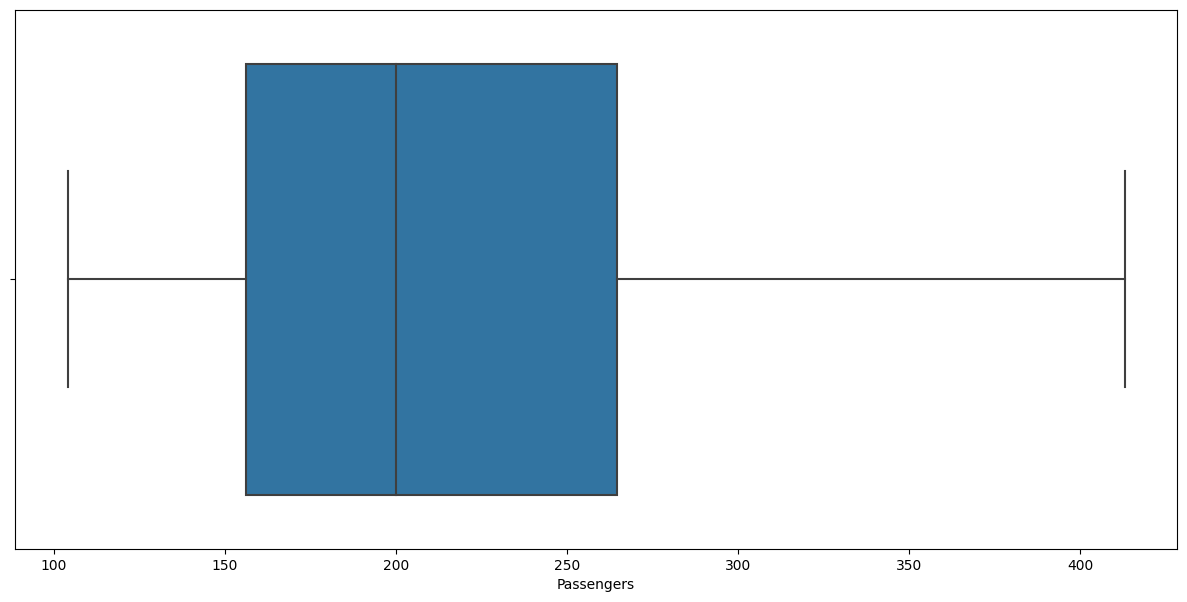

In [21]:
import seaborn as sns
sns.boxplot(x="Passengers",data=df)

<Axes: xlabel='Month'>

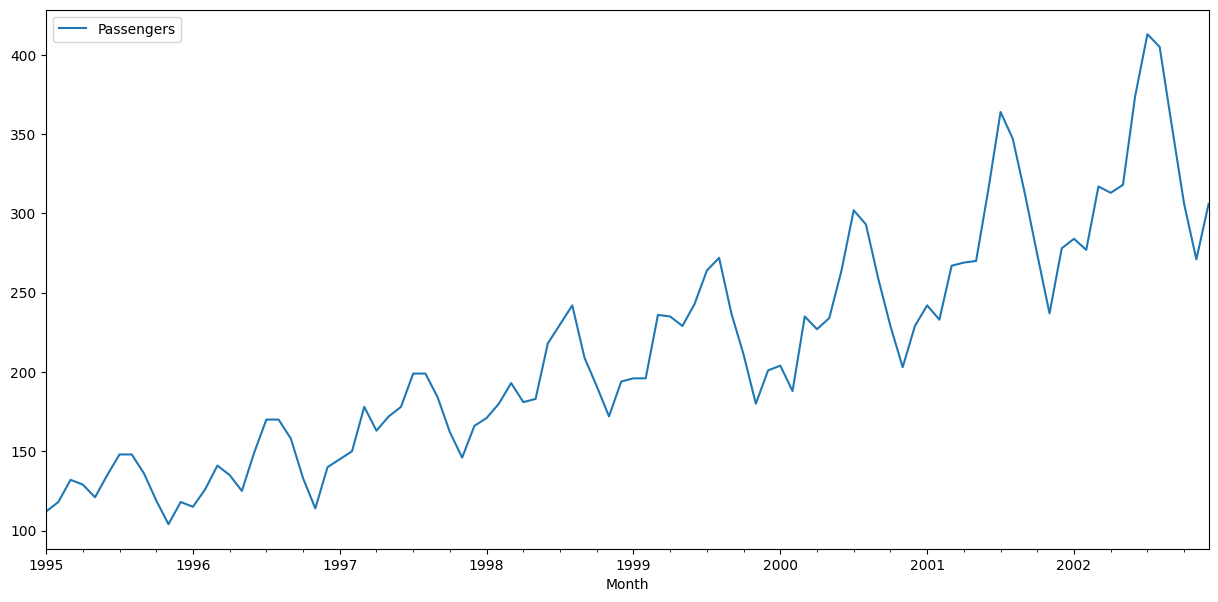

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Passengers'])

In [13]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
adfuller_test(df['Passengers'])        

ADF Test Statistic : 1.3402479596467023
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations : 83
weak evidence against null hypothesis,indicating it is non-stationary 


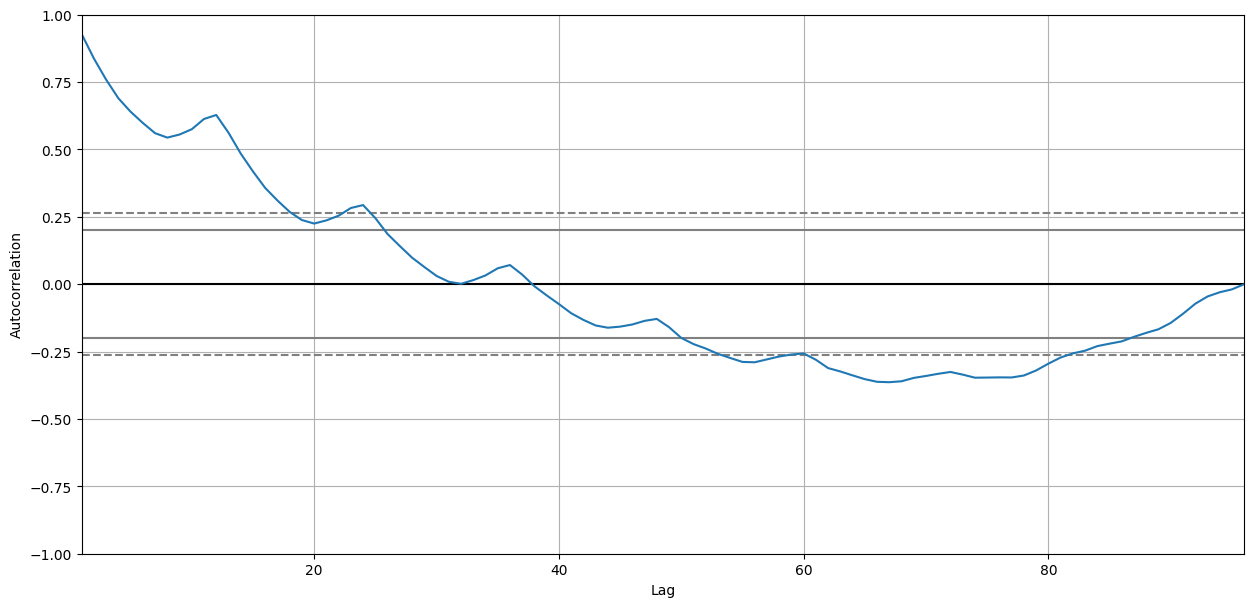

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Passengers'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.411
Date:                Sat, 26 Aug 2023   AIC                            860.821
Time:                        16:54:00   BIC                            868.483
Sample:                    01-01-1995   HQIC                           863.917
                         - 12-01-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4822      0.168     -2.868      0.004      -0.812      -0.153
ma.L1          0.8325      0.102      8.177      0.000       0.633       1.032
sigma2       471.4432     85.326      5.525      0.000     304.208     638.678
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.28
Prob(Q):                              0.89   Prob(JB):                         0.32
Heteroskedasticity (H):               3.87   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

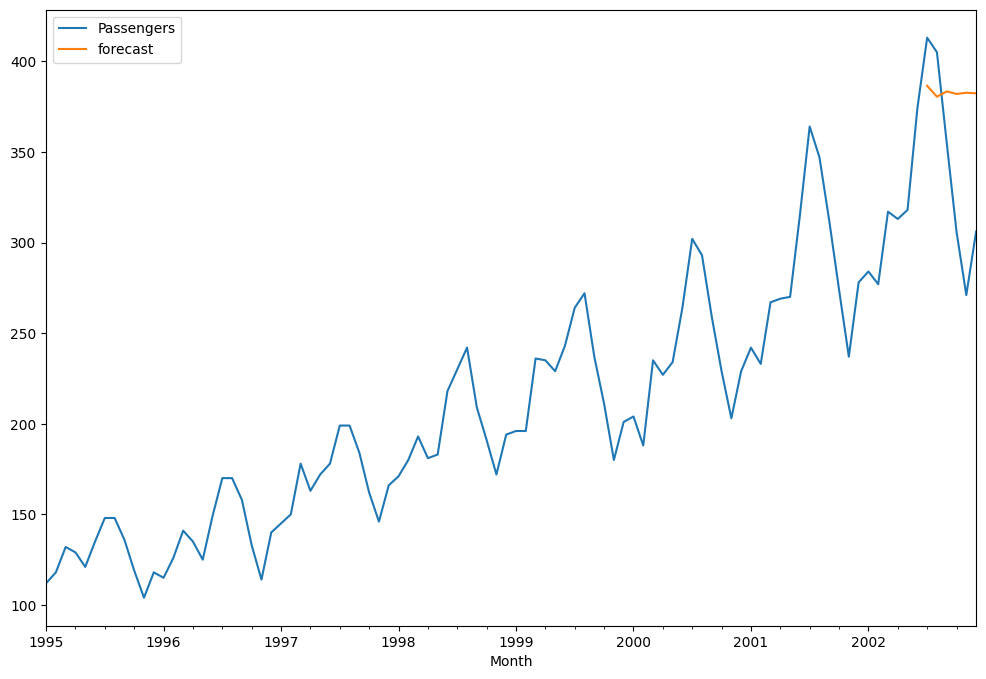

In [16]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

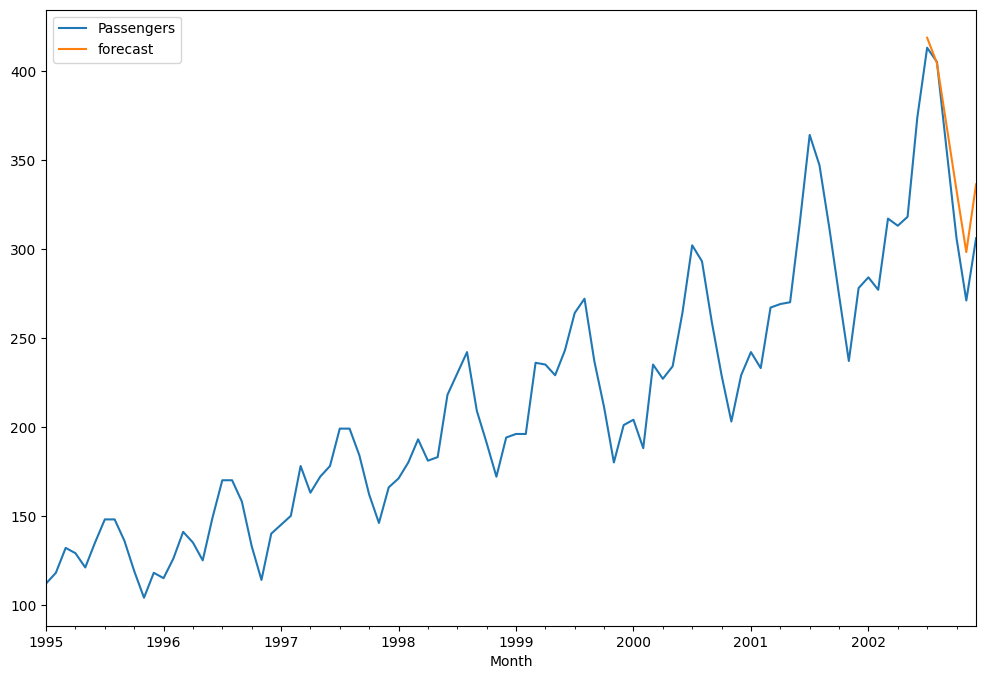

In [17]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

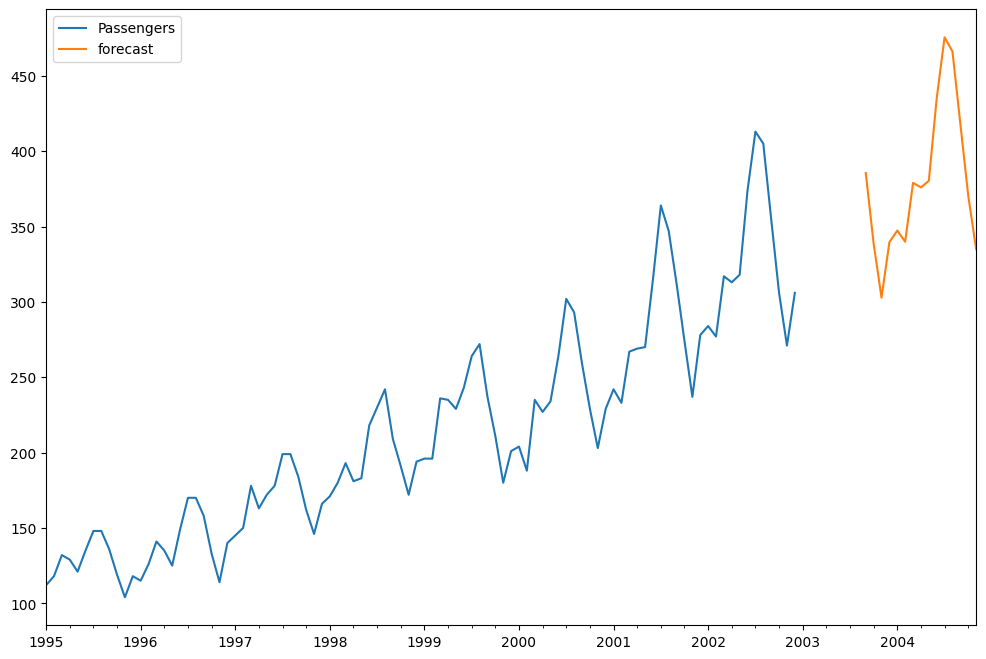

In [18]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))